## Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## Logistic Regression Explaination from StatQuest 

In [6]:
# With linear regression, the y-axis can be any number
# With logistic regression, the y-axis is confined to probability values between 0 to 1
# To solve this problem
# y-axis is transformed from "probability of X" to "log(odds of X)"
# p -> log(p/(1-p))

# Check out StatQuest, really good stuff on there!
# Stat Quest Logistic Regression Videos Explaination
# Logistic Regression Overerview -> https://www.youtube.com/watch?v=yIYKR4sgzI8&t=465s
# Logistic Regression Details Pt1: Coefficients -> https://www.youtube.com/watch?v=vN5cNN2-HWE&t=945s

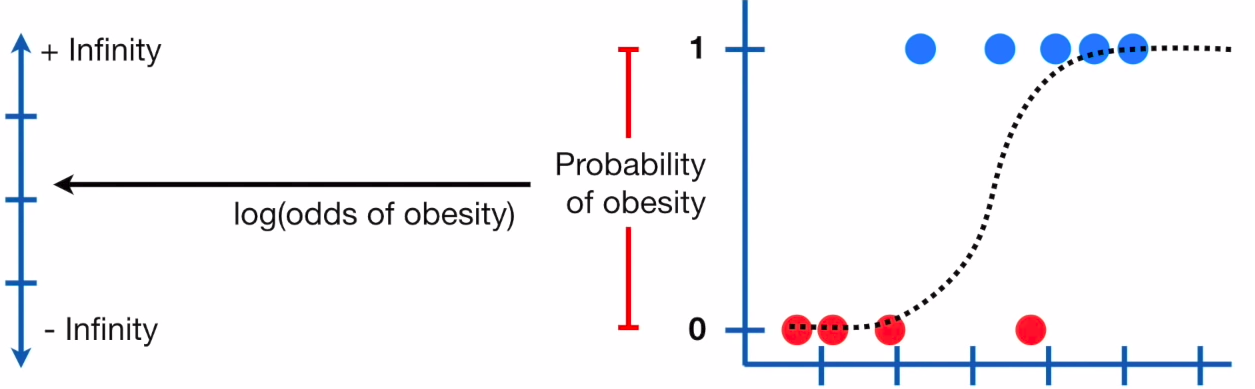

In [7]:
Image("Logistic_regression_intuition1.png", width=500, height=100)

## Organizing the Data

In [8]:
# Determining whether students were admitted or rejected based of two tests

datafile = "ex2data1.txt"
cols = np.loadtxt(datafile, delimiter=",", usecols=(0,1,2), unpack=True)

# for lists the order is [columns, rows]
# for numpy array the order is [rows, columns]
# numpy count starts at 0

X = np.transpose(np.array(cols[0:2,:]))
y = np.transpose(np.array(cols[2:,:]))
m = y.size


#np.insert(object, column which to insert, variable to insert, axis=1,0 to insert each row, column)
##Insert the usual column of 1's into the "X" matrix because theta0 is by itself, not multiplied to anything
X = np.insert(X,0,1,axis=1)

## Visualizing the Data

In [9]:
# Seperating data into passed vs failed pool
admitted = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
rejected = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# shape[0] = all rows | shape[1] = all columns

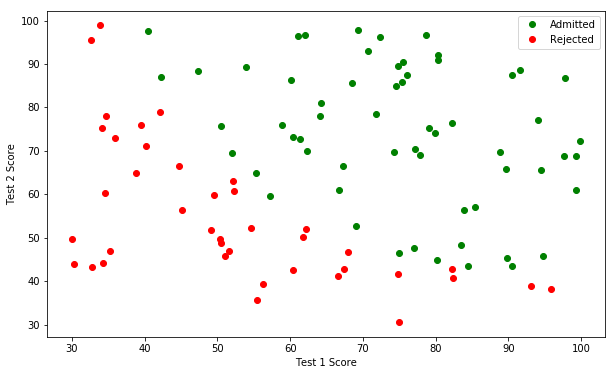

In [10]:
def plot_data():
    plt.figure(figsize=(10,6))
    plt.plot(admitted[:,1],admitted[:,2],'go',label='Admitted')
    plt.plot(rejected[:,1],rejected[:,2],'ro',label='Rejected')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend()

plot_data()

## Visualizing Sigmoid Function

In [11]:
from scipy.special import expit
# The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.expit.html

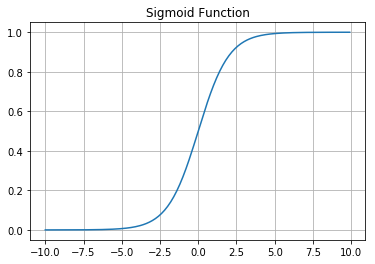

In [12]:
# Visualizing Sigmoid Function
myX = np.arange(-10,10,.1) #np.arange(min, max, increment) | myX.shape = (200,)
plt.plot(myX,expit(myX)) # expit(myX).shape = (200,)
plt.title("Sigmoid Function")
plt.grid(True)

## Cost Function Intuition

In [13]:
# Cost(h_theta(X),y) = -log(h_theta(X)) if y = 1 | -log(1 - h_theta(x)) if y = 0
# If hypothesis function predicts 0, but result is actually 1,
# then the algorithm gets penalized at a very high cost

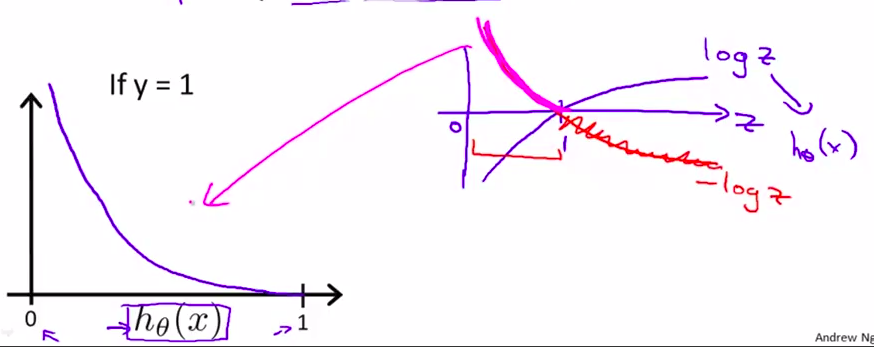

In [14]:
Image("Cost_function_intuition1.png", width=500, height=100)

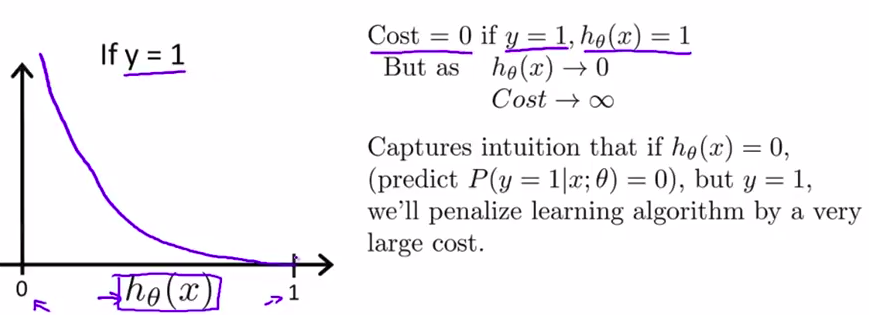

In [15]:
Image("Cost_function_intuition2.png", width=500, height=100)

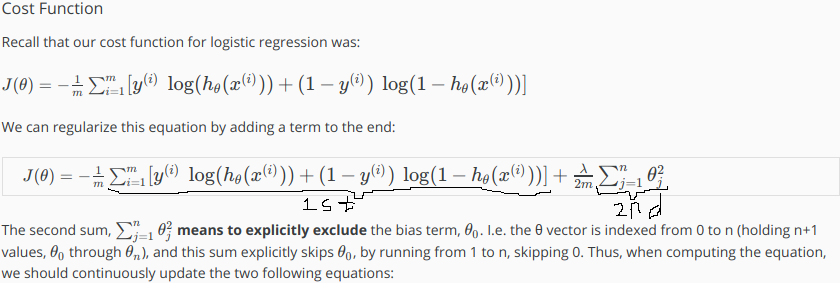

In [16]:
Image("Regularized_cost_function2.png", width=800, height=300)

## Implementing Logistic Regression 

In [18]:
# for lists the order is [columns, rows]
# for numpy array the order is [rows, columns]
# numpy count starts at 0
# shape[1] = # of columns | shape[0] = # of rows

initial_theta = np.zeros((X.shape[1],1)) # shape = (3,1)

In [19]:
# Hypothesis function
def hypothesis(theta,X):
    return expit(np.dot(X,theta))

# X.shape = (100, 3)
# hypothesis(initial_theta,X).shape =(100, 1)

In [20]:
# Cost function
def cost_function(theta,X,y,my_lambda=0.):
    term1 = np.dot(np.array(y).T,np.log(hypothesis(theta,X)))
    term2 = np.dot((1-np.array(y)).T,np.log(1-hypothesis(theta,X)))
    regterm = (my_lambda/(2*m)) * np.sum(np.dot(theta[1:].T,theta[1:])) #Skip theta0
    return float(-(1./m) * (np.sum(term1 + term2))) + regterm

# np.array(y).shape = (100,1)
# np.array(y).T.shape = (1,100)
# np.log(hypothesis(initial_theta,X)).shape = (100,1)
# np.log(1-h(initial_theta,X)).shape = (100,1)
# initial_theta[1:].T.shape = (1, 2)
# initial_theta[1:].shape = (2, 1)
# term1.shape = (1,1)
# term2.shape = (1,1)
# np.sum(term1 + term2) = ()

In [21]:
# check what initial cost function returns
cost_function(initial_theta,X,y)

0.6931471805599453

In [22]:
# Optimize function
# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
# Related video --> https://www.youtube.com/watch?v=cXHvC_FGx24
# Note "fmin" does not need to be told explicitly the derivative terms
# It only needs the cost function, and it minimizes with the "downhill simplex algorithm."

from scipy import optimize

def optimize_theta(theta, X, y, my_lambda=0.):
    result = optimize.fmin(cost_function, x0=theta, args=(X,y,my_lambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [23]:
theta, mincost = optimize_theta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [24]:
# Optimized theta values and cost
theta, mincost

(array([-25.16130062,   0.20623142,   0.20147143]), 0.2034977015902151)

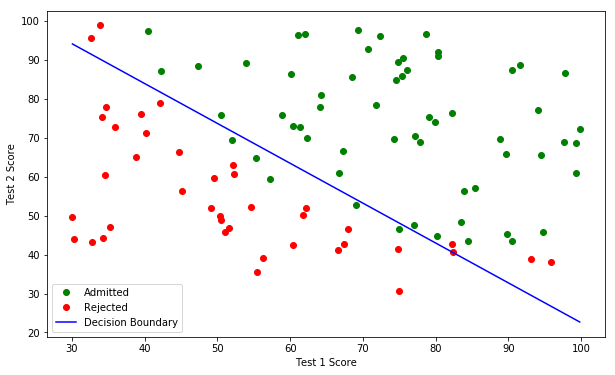

In [25]:
# Decision boundary
# Decision boundary occurs when h = 0, or when
# theta0 + theta1*x1 + theta2*x2 = 0
# y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)
# test 1 score is the boundary_xaxis
# test 2 score is the boundary_yaxis

boundary_xaxis = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_yaxis = (-1./theta[2])*(theta[0] + theta[1]*boundary_xaxis)
plot_data()
plt.plot(boundary_xaxis,boundary_yaxis,'b-',label='Decision Boundary')
plt.legend()

In [26]:
# Testing hypothesis function
hypothesis(theta, np.array([1,50.,85.]))

# A student with 50% on test 1 and 85% on test 2 has a 90.6% of getting admitted

0.906814168348852